In [1]:
import hippomaps as hm
import nibabel as nib
import numpy as np 

In [2]:
surf_flat = nib.load("wetruns/test-hippunfold_v1.5.1/lowresMRI/hippunfold/sub-01/surf/sub-01_hemi-L_space-unfold_den-0p5mm_label-hipp_midthickness.surf.gii")
surf = nib.load("wetruns/test-hippunfold_v1.5.1/lowresMRI/hippunfold/sub-01/surf/sub-01_hemi-L_space-T1w_den-0p5mm_label-hipp_midthickness.surf.gii")

In [3]:
xyz = surf_flat.get_arrays_from_intent(nib.nifti1.intent_codes["NIFTI_INTENT_POINTSET"])[0].data
vertices = surf.get_arrays_from_intent(nib.nifti1.intent_codes["NIFTI_INTENT_POINTSET"])[0].data
faces = surf_flat.get_arrays_from_intent(nib.nifti1.intent_codes["NIFTI_INTENT_TRIANGLE"])[0].data
vertices_flat = surf_flat.get_arrays_from_intent(nib.nifti1.intent_codes["NIFTI_INTENT_POINTSET"])[0].data

In [4]:
# Define number of squares in x and y directions
num_squares_x = 8
num_squares_y = 4

# Get X and Y columns
x, y = xyz[:, 0], xyz[:, 1]

# Normalize x and y to range [0, 1] (or any known bounding box)
x_min, x_max = x.min(), x.max()
y_min, y_max = y.min(), y.max()

x_norm = (x - x_min) / (x_max - x_min)
y_norm = (y - y_min) / (y_max - y_min)

# Find which square each point falls into
x_square = (x_norm * num_squares_x).astype(int)
y_square = (y_norm * num_squares_y).astype(int)

# Make checkerboard pattern: alternate 0 and 1
checkerboard = (x_square + y_square) % 2

# Reshape to Nx1
checkerboard = checkerboard.reshape(-1, 1)

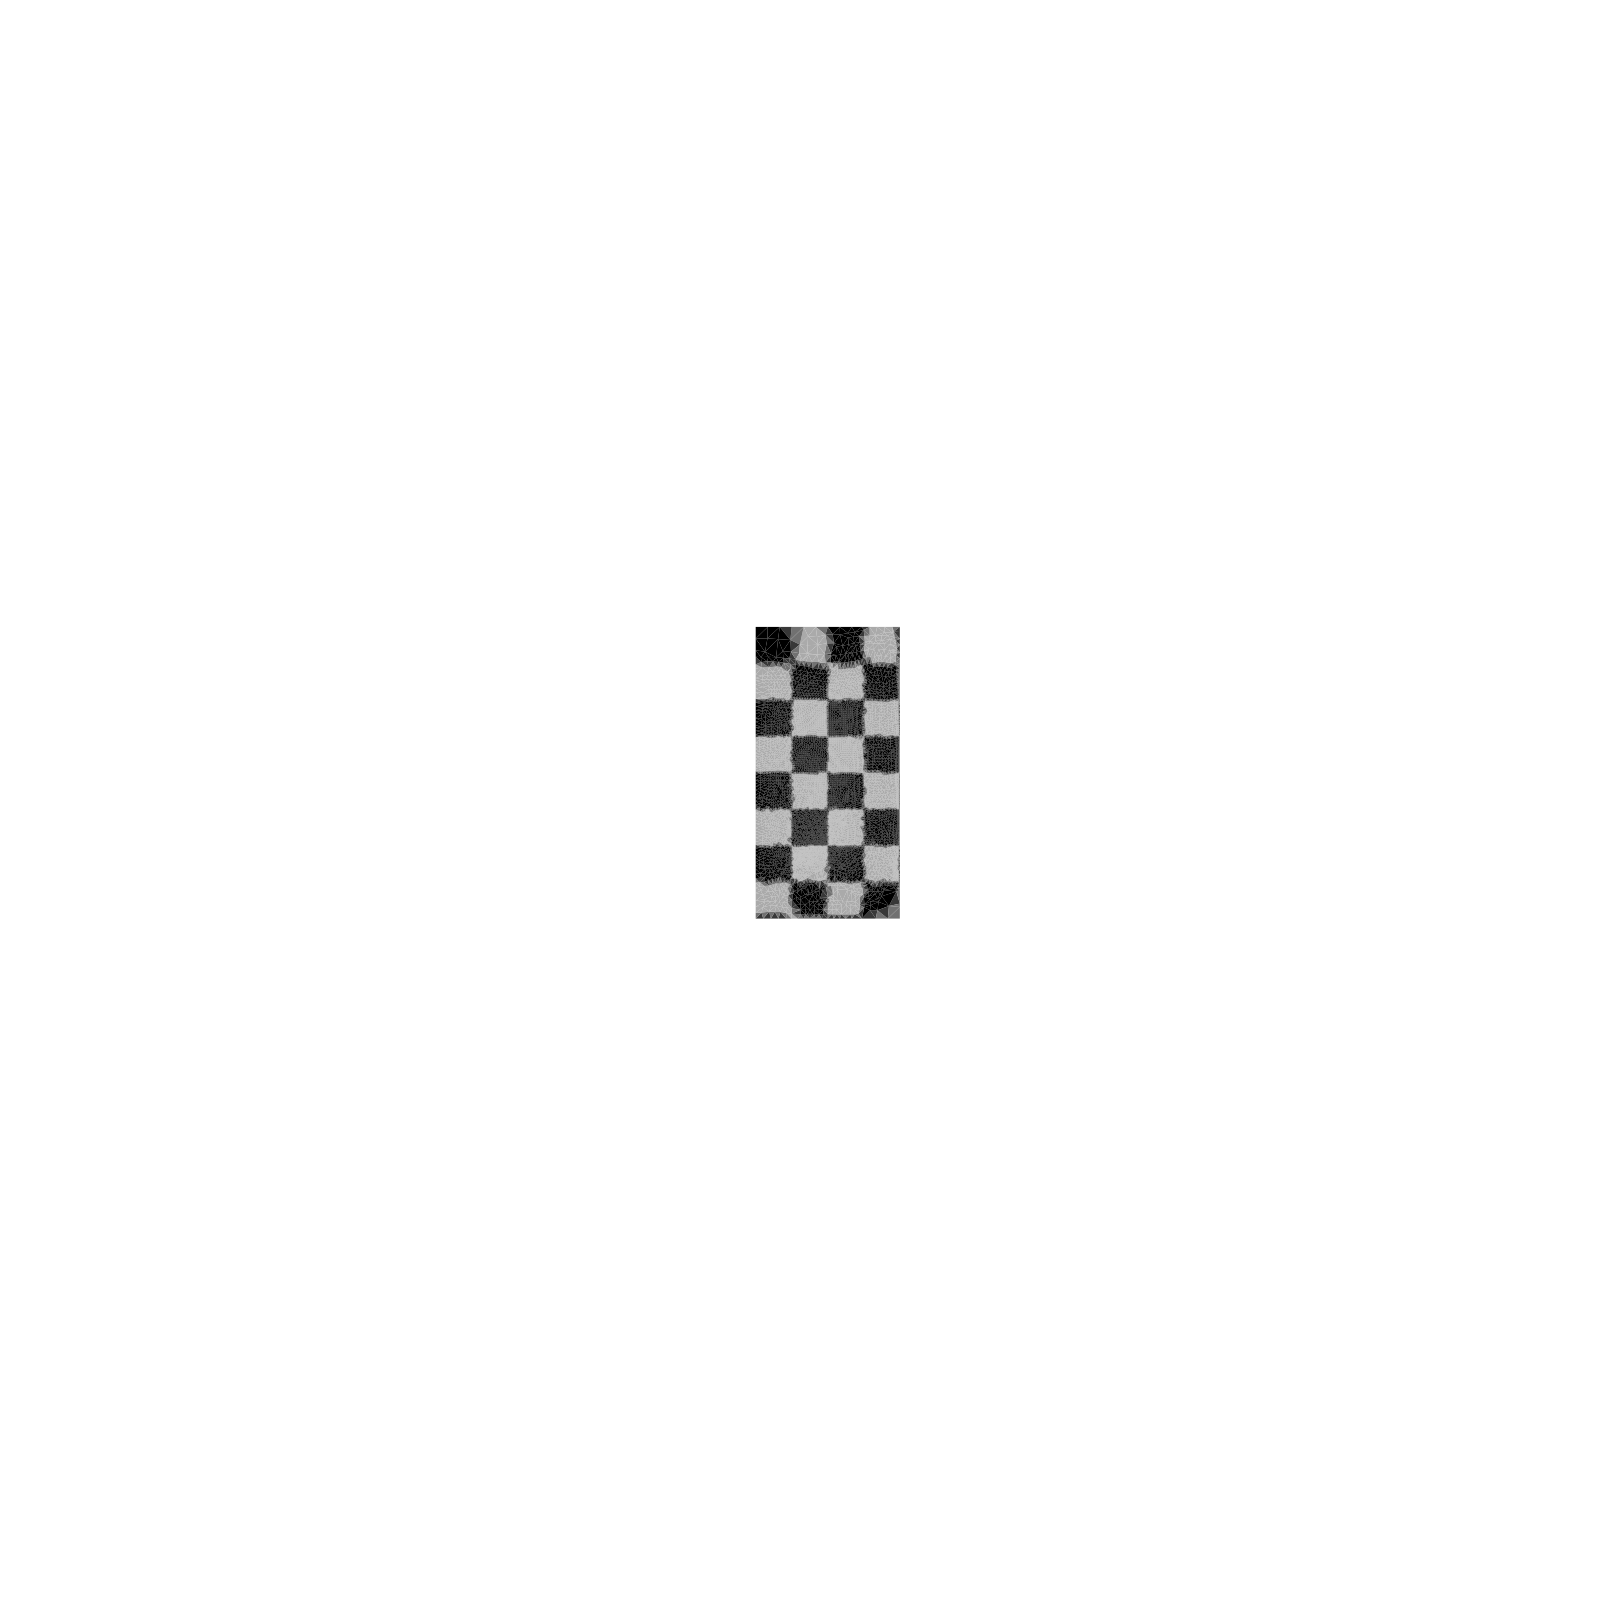

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

# Assume you already have:
# - vertices: (N, 3)
# - faces: (M, 3)
# - checkerboard: (N, 1)

v = vertices_flat

fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111, projection='3d')

# Create face vertex coordinates
mesh_faces = v[faces]

# Create face colors from checkerboard values (averaged per face)
face_colors = checkerboard[faces].mean(axis=1).flatten()

# Add surface mesh
collection = Poly3DCollection(mesh_faces, array=face_colors, cmap='gray', clim=[0, 1.5], edgecolor='none')
ax.add_collection3d(collection)

# Compute bounding box
x, y, z = v[:, 0], v[:, 1], v[:, 2]
max_range = np.ptp(np.concatenate([x, y, z])) / 3
mid_x, mid_y, mid_z = np.mean(x), np.mean(y), np.mean(z)

# Set axes to equal scale
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

ax.set_axis_off()

# View from below
ax.view_init(elev=90, azim=0)

# Tight layout and crop space
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

plt.show()

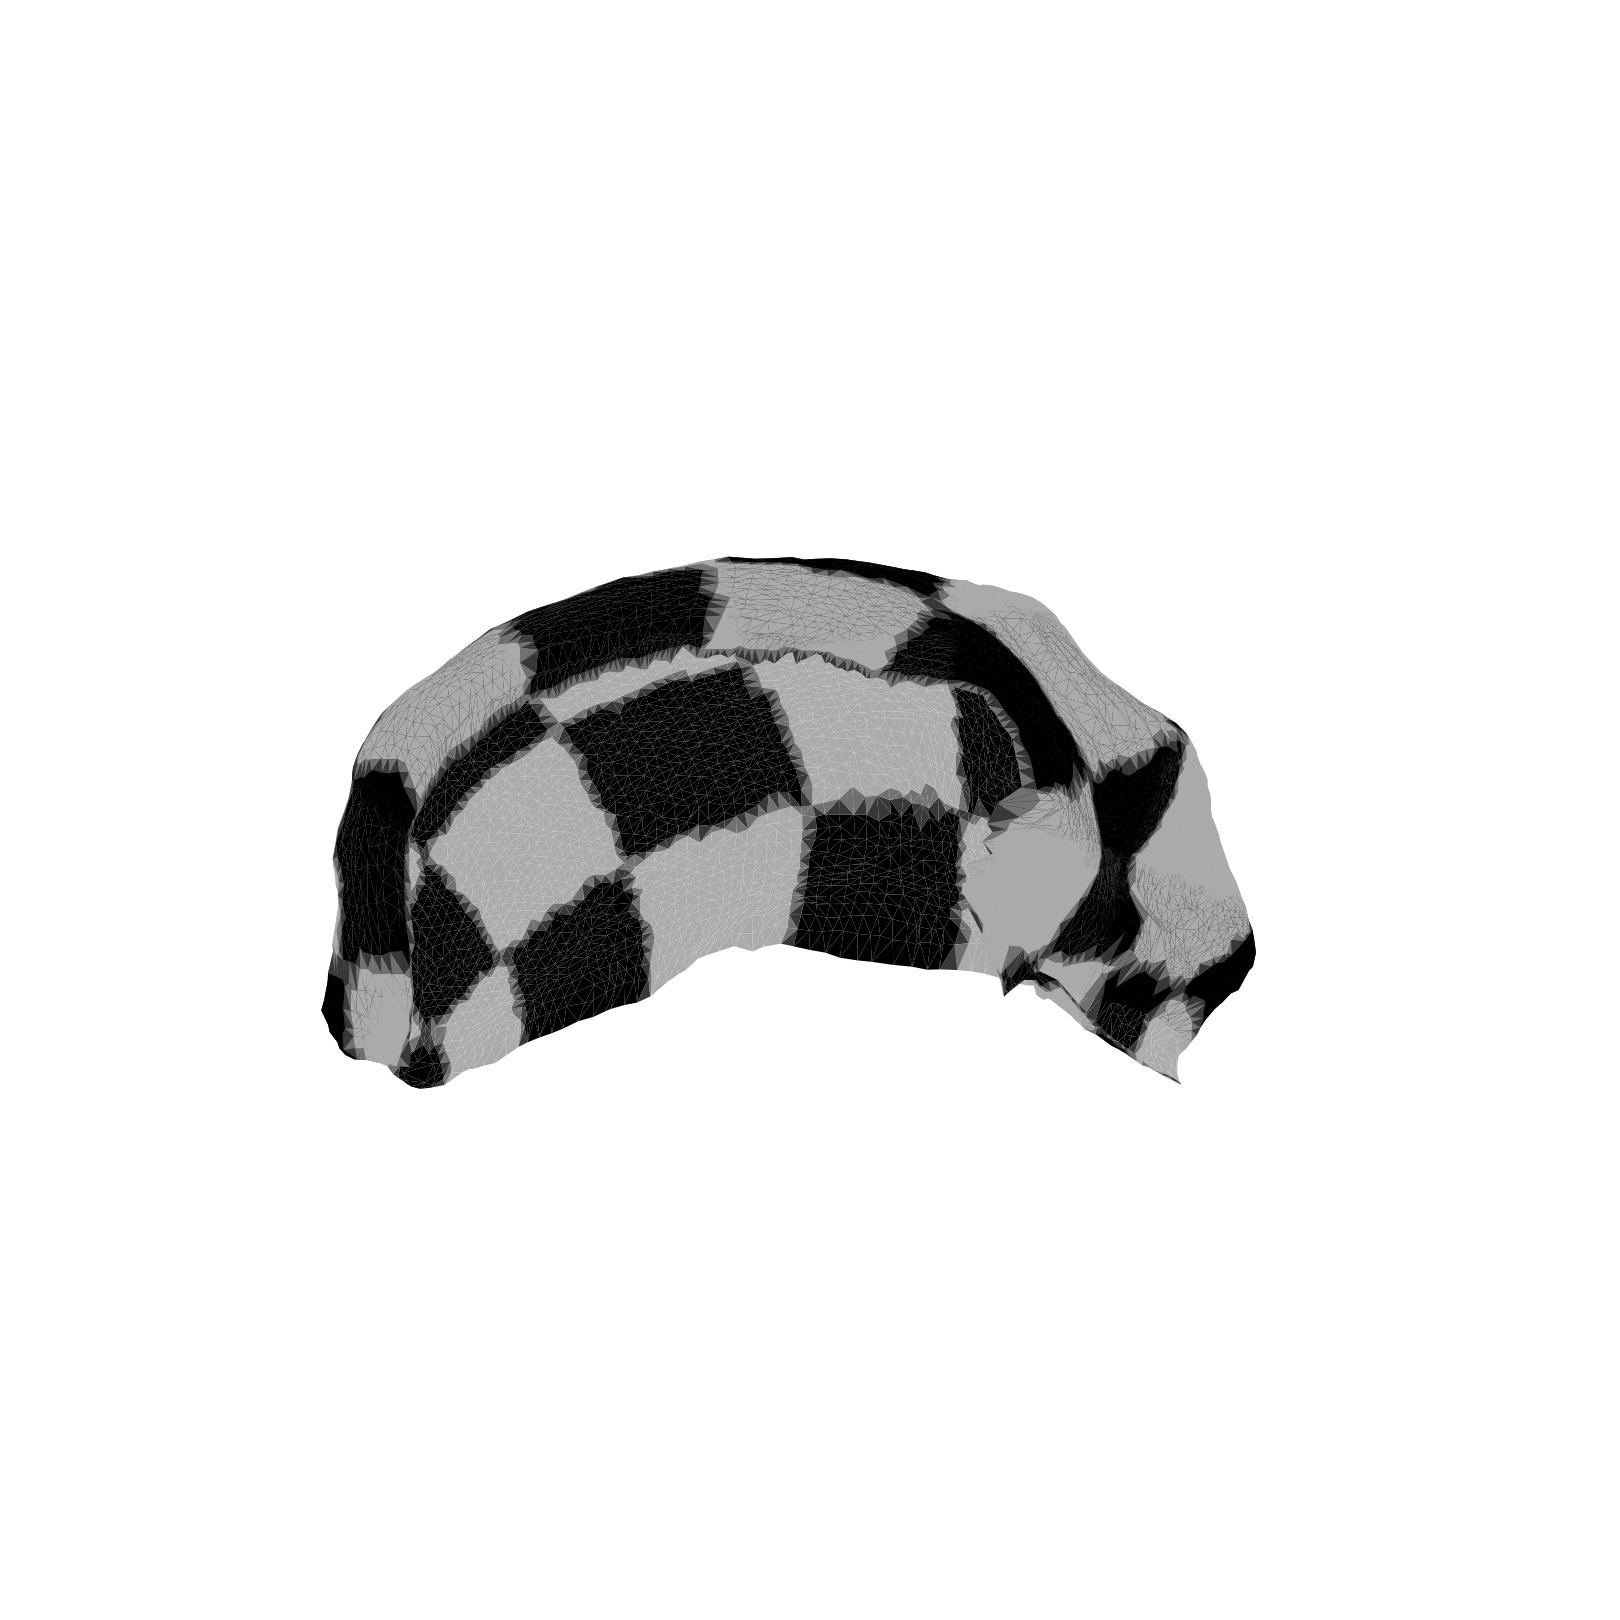

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

# Assume you already have:
# - vertices: (N, 3)
# - faces: (M, 3)
# - checkerboard: (N, 1)

v = vertices

fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111, projection='3d')

# Create face vertex coordinates
mesh_faces = v[faces]

# Create face colors from checkerboard values (averaged per face)
face_colors = checkerboard[faces].mean(axis=1).flatten()

# Add surface mesh
collection = Poly3DCollection(mesh_faces, array=face_colors, cmap='gray', clim=[0, 1.5], edgecolor='none')
ax.add_collection3d(collection)

# Compute bounding box
x, y, z = v[:, 0], v[:, 1], v[:, 2]
max_range = np.ptp(np.concatenate([x, y, z])) / 3
mid_x, mid_y, mid_z = np.mean(x), np.mean(y), np.mean(z)

# Set axes to equal scale
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

ax.set_axis_off()

# View from below
ax.view_init(elev=90, azim=0)

# Tight layout and crop space
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

plt.show()

In [8]:
surf_flat = nib.load("wetruns/test-hippunfold_v2.0.0/lowresMRI/sub-01/surf/sub-01_hemi-L_space-unfold_den-8k_label-hipp_midthickness.surf.gii")
surf = nib.load("wetruns/test-hippunfold_v2.0.0/lowresMRI/sub-01/surf/sub-01_hemi-L_space-T1w_den-8k_label-hipp_midthickness.surf.gii")

In [9]:
xyz = surf_flat.get_arrays_from_intent(nib.nifti1.intent_codes["NIFTI_INTENT_POINTSET"])[0].data
vertices = surf.get_arrays_from_intent(nib.nifti1.intent_codes["NIFTI_INTENT_POINTSET"])[0].data
faces = surf_flat.get_arrays_from_intent(nib.nifti1.intent_codes["NIFTI_INTENT_TRIANGLE"])[0].data
vertices_flat = surf_flat.get_arrays_from_intent(nib.nifti1.intent_codes["NIFTI_INTENT_POINTSET"])[0].data

In [12]:
# Define number of squares in x and y directions
num_squares_x = 8
num_squares_y = 4

# Get X and Y columns
x, y = xyz[:, 0], xyz[:, 1]

# Normalize x and y to range [0, 1] (or any known bounding box)
x_min, x_max = x.min(), x.max()
y_min, y_max = y.min(), y.max()

x_norm = (x - x_min) / (x_max - x_min)
y_norm = (y - y_min) / (y_max - y_min)

# Find which square each point falls into
x_square = (x_norm * num_squares_x).astype(int)
y_square = (y_norm * num_squares_y).astype(int)

# Make checkerboard pattern: alternate 0 and 1
checkerboard = (x_square + y_square) % 2

# Reshape to Nx1
checkerboard = checkerboard.reshape(-1, 1)

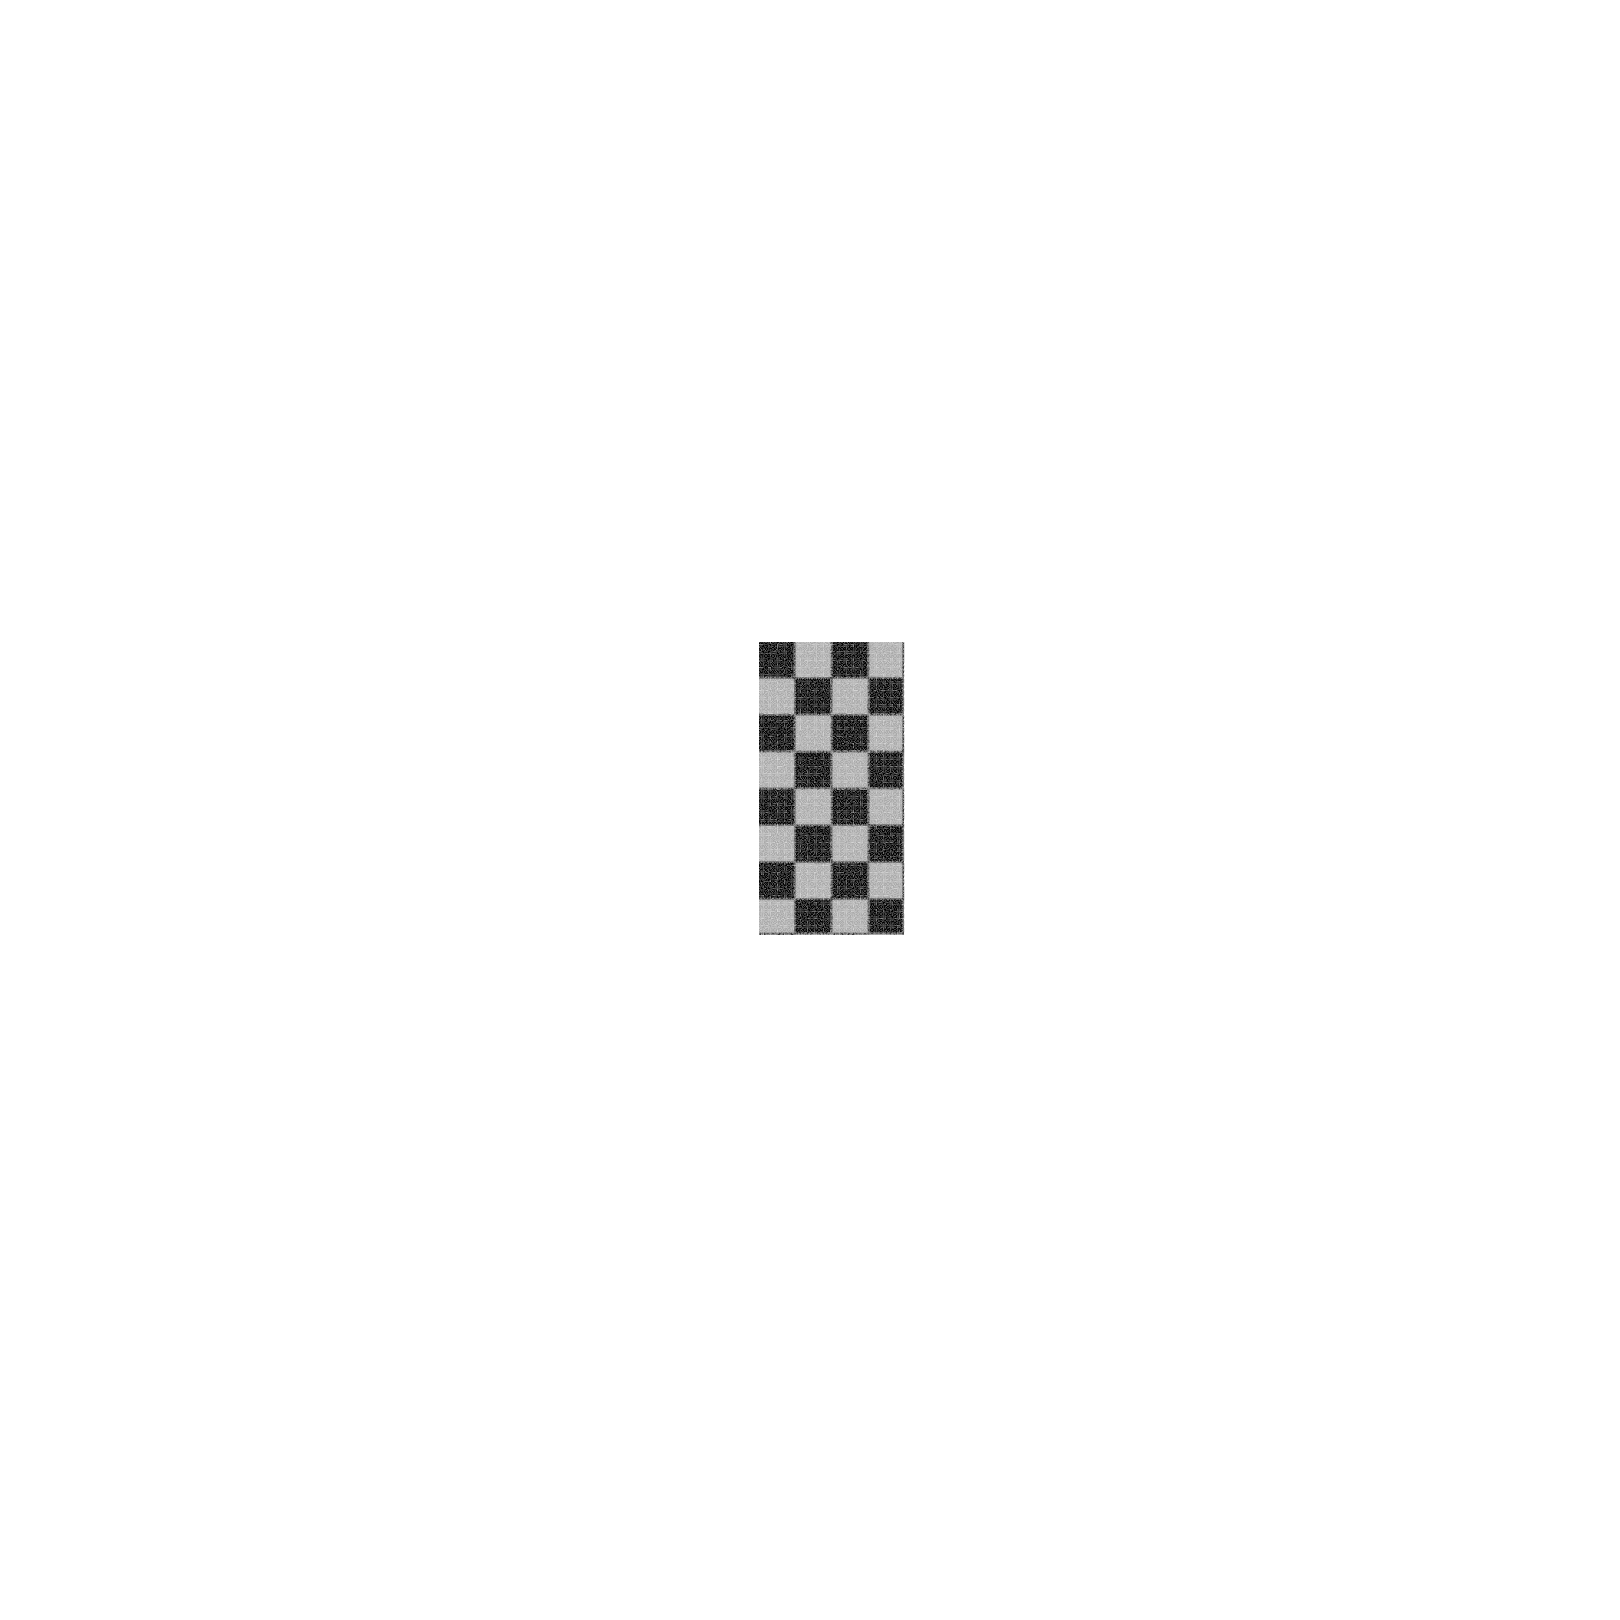

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

# Assume you already have:
# - vertices: (N, 3)
# - faces: (M, 3)
# - checkerboard: (N, 1)

v = vertices_flat

fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111, projection='3d')

# Create face vertex coordinates
mesh_faces = v[faces]

# Create face colors from checkerboard values (averaged per face)
face_colors = checkerboard[faces].mean(axis=1).flatten()

# Add surface mesh
collection = Poly3DCollection(mesh_faces, array=face_colors, cmap='gray', clim=[0, 1.5], edgecolor='none')
ax.add_collection3d(collection)

# Compute bounding box
x, y, z = v[:, 0], v[:, 1], v[:, 2]
max_range = np.ptp(np.concatenate([x, y, z])) / 3
mid_x, mid_y, mid_z = np.mean(x), np.mean(y), np.mean(z)

# Set axes to equal scale
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

ax.set_axis_off()

# View from below
ax.view_init(elev=90, azim=0)

# Tight layout and crop space
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

plt.show()

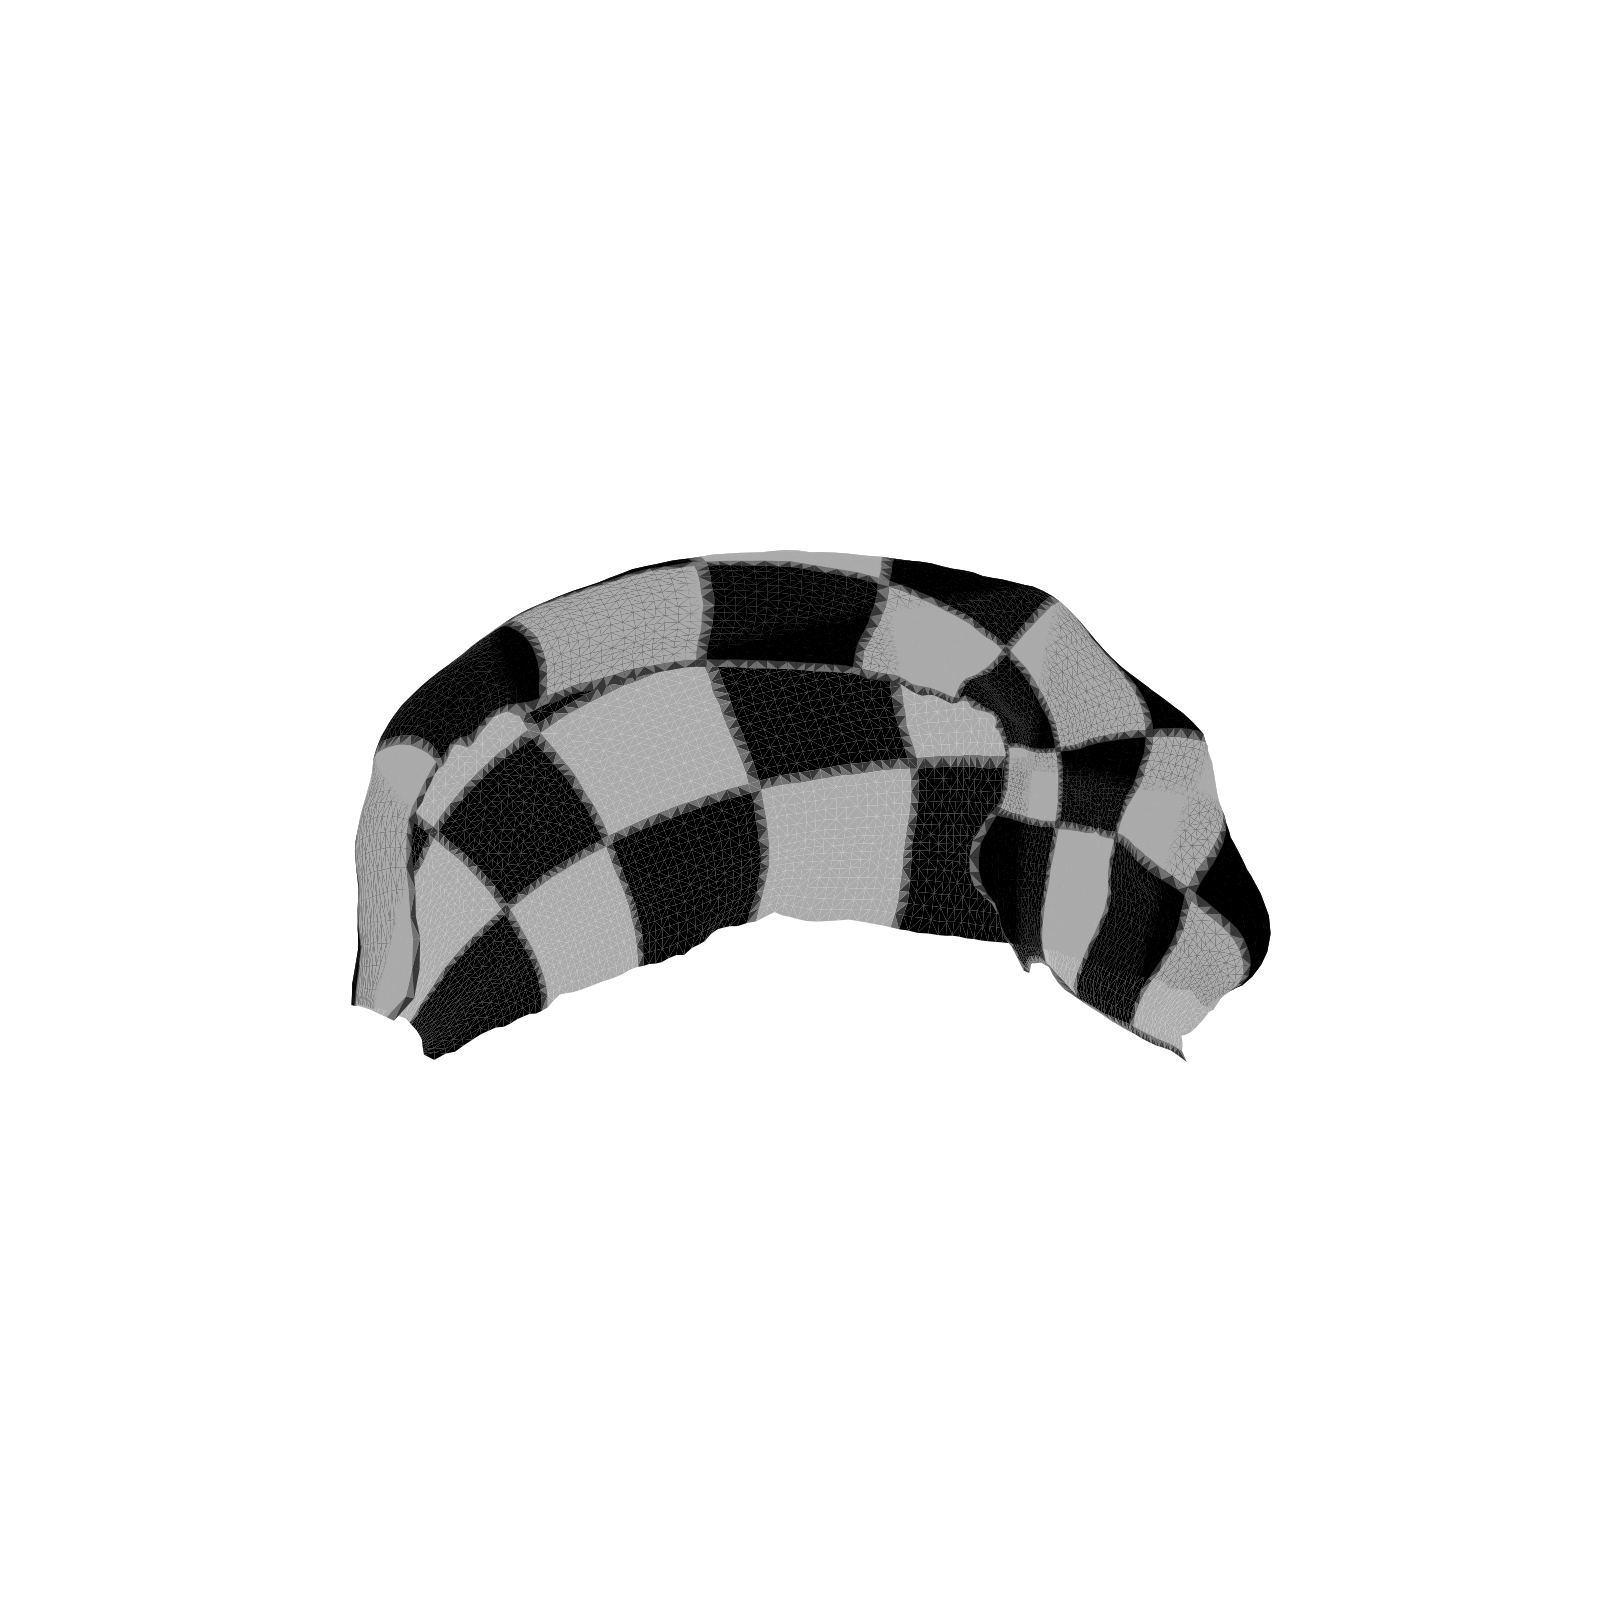

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

# Assume you already have:
# - vertices: (N, 3)
# - faces: (M, 3)
# - checkerboard: (N, 1)

v = vertices

fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111, projection='3d')

# Create face vertex coordinates
mesh_faces = v[faces]

# Create face colors from checkerboard values (averaged per face)
face_colors = checkerboard[faces].mean(axis=1).flatten()

# Add surface mesh
collection = Poly3DCollection(mesh_faces, array=face_colors, cmap='gray', clim=[0, 1.5], edgecolor='none')
ax.add_collection3d(collection)

# Compute bounding box
x, y, z = v[:, 0], v[:, 1], v[:, 2]
max_range = np.ptp(np.concatenate([x, y, z])) / 3
mid_x, mid_y, mid_z = np.mean(x), np.mean(y), np.mean(z)

# Set axes to equal scale
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

ax.set_axis_off()

# View from below
ax.view_init(elev=90, azim=0)

# Tight layout and crop space
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

plt.show()